# MAS DSE 200: Homework 3 - Matplotlib

#### Tasks:

- Introduction to Matplotlib.  
  
- Submission on Gradescope:
  - Submit this Jupyter notebook to "Homework 3"

#### Due date: Thursday, November 6, 2025, 11:59 PM

---

Remember: when in doubt, read the documentation first.

Python - https://docs.python.org/3/

NumPy - https://numpy.org/doc/stable/

pandas - https://pandas.pydata.org/docs/

matplotlib - https://matplotlib.org/stable/contents.html

seaborn - https://seaborn.pydata.org/api.html

## Instructions

* You don’t need to explain your approach (unless specified) so please be concise in your submission.
* To obtain full marks for a question, both the answer and the code should be correct.
* Completely wrong (or missing) code with correct answer will result in zero marks.

### Imports

In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn

In [2]:
import pandas as pd
import numpy as np
import random
import os
import requests
import matplotlib.pyplot as plt
import seaborn as sns

### Preliminaries

Load the cars data into a Pandas DataFrame called cars_df.

In [3]:
thePath = "./" #check the current directory/folder
theFile = 'cars.csv'
theLink = "https://dse200.dev/Day3/cars.csv"

if not os.path.exists(thePath + theFile):
    r = requests.get(theLink)
    with open(thePath + theFile, 'wb') as f:
        f.write(r.content)

#cars_df = pd.read_csv('cars.csv')

In [4]:
thePath = "./" # save to this directory
theFile = 'cars.csv' # name the file
theLink = "https://dse200.dev/Day3/cars.csv" # web location for file

# os python module for navigating directory, paths is to check a direction and exists see if it's there
if not os.path.exists(thePath + theFile): # if the file doesn't exists in this path
  r = requests.get(theLink) # define variable for reaching out to this location
  with open(thePath + theFile, 'wb') as f: # open a new file in this directory named how we wanted then then close it after moving on from the block of code (automatically). name the file as f. wb = write binary
    f.write(r.content) #take the content we got from r and write it to the file
cars_df = pd.read_csv('cars.csv')
cars_df.head(5)

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


In [5]:
len(cars_df)

5076

In [6]:
cars_df.head(1)

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236


### 1. Inspect data - 1 point

1.1 What is the number of unique car identifiers (`Identification.ID`)? - 0.5 points

In [7]:
# YOUR CODE HERE
unique_ids = cars_df['Identification.ID'].nunique() #or .drop_duplicates().shape[0]
unique_ids

5030

1.2 What is the number of unique entries in the dataset when jointly looking at `Identification.ID` AND `Identification.Year`? Note that this should be greater than the value obtained before - 0.5 points

In [8]:
# YOUR CODE HERE
unique_ids_and_years = cars_df[['Identification.ID','Identification.Year']].drop_duplicates().shape[0]
unique_ids_and_years

5039

In [9]:
!pip install pandera

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 4.6 MB/s eta 0:00:00


In [10]:
# quick sanity checks for data being right
import pandera as pa
from pandera import DataFrameSchema, Column, Check

schema = DataFrameSchema({
    "Identification.ID": Column(str),
    "Identification.Year": Column(int, Check(lambda x: x.between(1990, 2025),
                                             error="Year must be between 1990 and 2025")),
    "Fuel Information.City mpg": Column(int, Check(lambda x: x.between(1,70),
                                                   error="City MPG must be between 1 and 70")),
    "Engine Information.Hybrid": Column(bool, Check(lambda x: x.isin([True, False]),
                                                    error="Hybrid field must be True or False")),
    "Fuel Information.Highway mpg": Column(int, Check(lambda x: x.between(1, 150),
                                                      error="Highway MPG must be between 1 and 150"))
},
  checks=[
      Check(lambda df: unique_ids_and_years > unique_ids,
      error="Fewer unique (ID, Year) pairs than unique IDs."),
      #removed the city < highway considering some hybrids
      # Check(lambda df: (df["Fuel Information.City mpg"] < df["Fuel Information.Highway mpg"]).all(),
      # error="City MPG should always be less than highway MPG"),
      Check(lambda df: (df["Dimensions.Height"] > df["Dimensions.Length"]).all(),
      error="Car height should be less than its length."),
      Check(lambda df: (df["Engine Information.Engine Statistics.Torque"]>0).all(),
      error="Tourque should be > 0.")
  ]
                         )
#schema.validate(cars_df, lazy=True)

/usr/local/lib/python3.12/dist-packages/pandera/_pandas_deprecated.py:149: FutureWarning: Importing pandas-specific classes and functions from the
top-level pandera module will be **removed in a future version of pandera**.
If you're using pandera to validate pandas objects, we highly recommend updating
your import:

```
# old import
import pandera as pa

# new import
import pandera.pandas as pa
```

If you're using pandera to validate objects from other compatible libraries
like pyspark or polars, see the supported libraries section of the documentation
for more information on how to import pandera:

https://pandera.readthedocs.io/en/stable/supported_libraries.html

To disable this warning, set the environment variable:

```
export DISABLE_PANDERA_IMPORT_WARNING=True
```

  warnings.warn(_future_warning, FutureWarning)


pandera found several issue with several of the data assumptions which could get cleaned after the data split.

In [11]:
assert unique_ids_and_years > unique_ids

### 2. Distribution of data - 3 points
a) Plot a distribution(histogram) of Highway fuel economy(`Fuel Information.Highway mpg`). Overlay this plot with a density plot of the same quantity - 2 points

Note:
1. Each value must have its own bin (Hint - use `range`) and should occupy the entire width of the plot
2. Each bar of the histogram should be blue and separated by black border(Hint - look at `ec` parameter of matplotlib's histogram API)
3. The overlaying density line should be orange

In [12]:
from scipy.stats import gaussian_kde

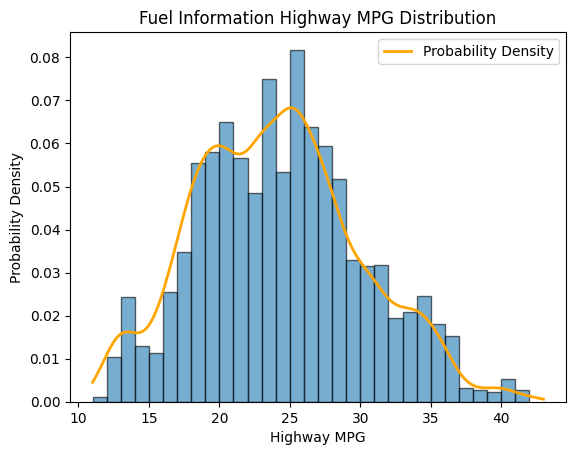

[None, None]

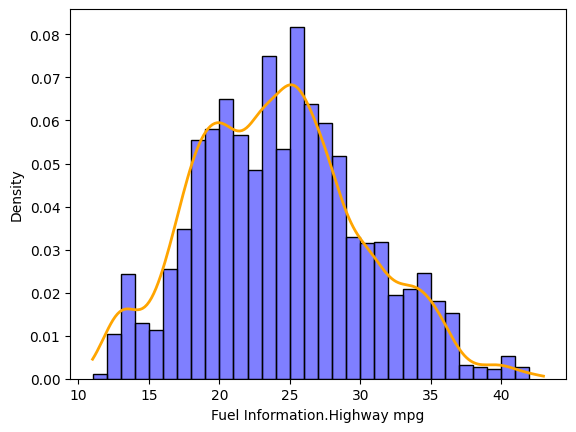

In [13]:
# YOUR CODE HERE
# plt.hist(data,bins,edgecolor)
# for density plot use scipy
from scipy.stats import gaussian_kde

# Filter out the unrealistic outlier
hwy_mpg_data = cars_df[cars_df["Fuel Information.Highway mpg"] < 100]["Fuel Information.Highway mpg"].copy()

# Create bins that cover the full range of the data
bins=range(int(hwy_mpg_data.min()),int(hwy_mpg_data.max()),1)

# plot the histogram
plt.hist(
    hwy_mpg_data,
    edgecolor='black',
    bins = bins,
    alpha = 0.6,
    density=True
)
# Create the density estimate
density = gaussian_kde(hwy_mpg_data)
x_vals = np.linspace(hwy_mpg_data.min(), hwy_mpg_data.max(), 200)
plt.plot(x_vals, density(x_vals), color='orange', linewidth=2, label='Probability Density')

# Labels and title
plt.title("Fuel Information Highway MPG Distribution")
plt.xlabel("Highway MPG")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

# Or the easier way with seaborn
import seaborn as sns
bins = range(int(hwy_mpg_data.min()),int(hwy_mpg_data.max()),1)
sns.histplot(hwy_mpg_data,bins=bins,color='blue',edgecolor='black',kde=True, stat='density')
plt.setp(plt.gca().lines, color='orange', linewidth=2)

b) Repeate the same for city fuel economy(`Fuel Information.City mpg`) - 0.5 point

(Subjective)(Optional) Is this plot similar to the previous one? Approximately, how much is city fuel economy lower compared to highway fuel economy?

A: They both have a bell shapped pattern and are right skewed (tail off toward the right). City is about 7 lower than highway since the most reoccuring bin for city is about 17 while the highway is about 25.

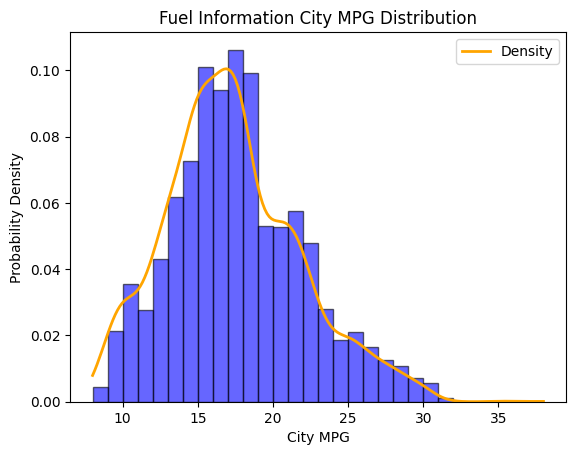

In [14]:
# YOUR CODE HERE
# create a dataframe excluding the data that is flawed

c_mpg_data = cars_df['Fuel Information.City mpg'].copy()
bin = range(int(c_mpg_data.min()),int(c_mpg_data.max()),1)
plt.hist(c_mpg_data, bins=bin, color='blue',edgecolor='black', alpha=0.6, density=True)

# Create the density estimate
density = gaussian_kde(c_mpg_data)
x_vals = np.linspace(c_mpg_data.min(), c_mpg_data.max(), 200)
plt.plot(x_vals, density(x_vals), color='orange', linewidth=2, label='Density')

# Labels and title
plt.title("Fuel Information City MPG Distribution")
plt.xlabel("City MPG")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

c) Repeat the same for Engine Horsepower(`Engine Information.Engine Statistics.Horsepower`) - 0.5 points

Note:

1. Use appropriate `bins`, since the range of horsepower is much higher than fuel economy. Hint - Try bin size of `10` or `20`
2. Experiment with different colors from 1 (a)


[None, None]

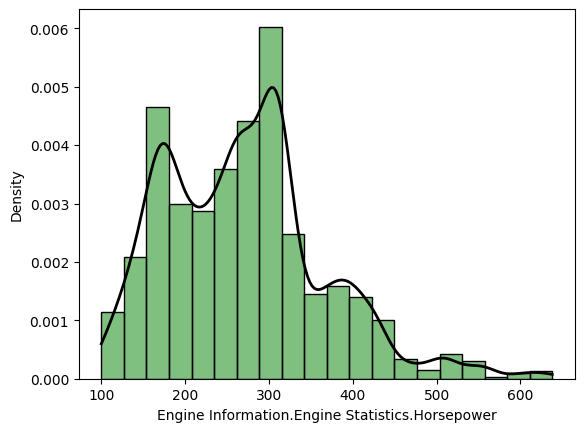

In [15]:
# YOUR CODE HERE
# set bin size as 10 or 20 since if we used the range min / max there would be 100s of bins
hp_data = cars_df['Engine Information.Engine Statistics.Horsepower'].copy()
sns.histplot(hp_data,bins=20,color='green', edgecolor = 'black', kde=True, stat='density')
plt.setp(plt.gca().lines, color='black', linewidth=2)

### 3. Correlation - 3 points

3.1 Plot a scatter plot, overlayed with a *line of best fit* plot, of engine horsepower vs highway fuel economy - 2 point

* The x-axis is engine power
* The y-axis is fuel economy
* Lable the axes appropriately
* Add an appropriate title
* Use [`np.polyfit`](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) or any other method/library to plot the line of best fit

* Hint - The resulting plot should look similar to [this](https://en.wikipedia.org/wiki/Simple_linear_regression#/media/File:Okuns_law_quarterly_differences.svg)

Reference  -[`Simple linear regression`](https://en.wikipedia.org/wiki/Simple_linear_regression)

You do not have to worry about the details of linear regression here. You can use any library function to do it for you

Slope: -0.037, Intercept: 34.222


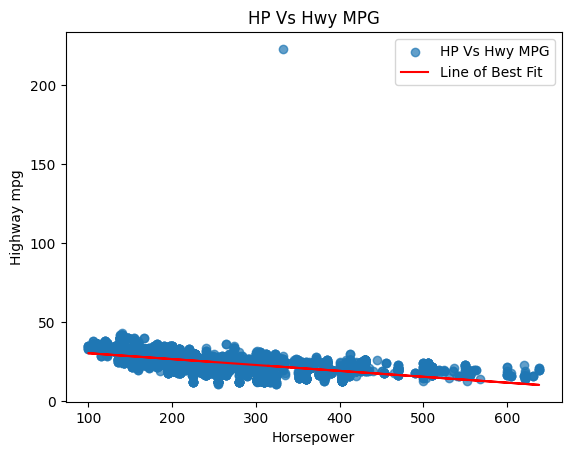

In [16]:
# YOUR CODE HERE
#.loc(df[rows] condition,columns)
hp_vs_hwy_mpg = cars_df[["Engine Information.Engine Statistics.Horsepower","Fuel Information.Highway mpg"]].copy()

#sns.scatterplot(hp_vs_hwy_mpg,x=hp_vs_hwy_mpg["Engine Information.Engine Statistics.Horsepower"], y = cars_df["Fuel Information.Highway mpg"])

# matplotlib
# define variables
x = hp_vs_hwy_mpg["Engine Information.Engine Statistics.Horsepower"]
y = hp_vs_hwy_mpg["Fuel Information.Highway mpg"]

# Use np.polyfit or any other method/library to plot the line of best fit
# 1 for degree is best fit
coeffs = np.polyfit(x,y,1)
m, b = coeffs
print(f"Slope: {m:.3f}, Intercept: {b:.3f}")

# plot scatter
plt.scatter(x, y, label="HP Vs Hwy MPG", alpha=.7)
# plot fitted line
plt.plot(x, m*x + b, color="red", label="Line of Best Fit")

#define the labels
plt.xlabel("Horsepower")
plt.ylabel("Highway mpg")
plt.title("HP Vs Hwy MPG")
plt.legend()
plt.show()

3.2 You might notice in the previous plot that there is an outlier(porbably an error) in fuel economy. Repate the plot after removing the outlier point - 0.5 points

(Optional)(Subjective) What can you tell about the correlation between engine horsepower and fuel economy?

A: The slope indicates that for every 1 increase in HP Hwy MPG decrease by ~.05 or every 100 extra hp costs about 5 mpg.

Slope: -0.038, Intercept: 34.255


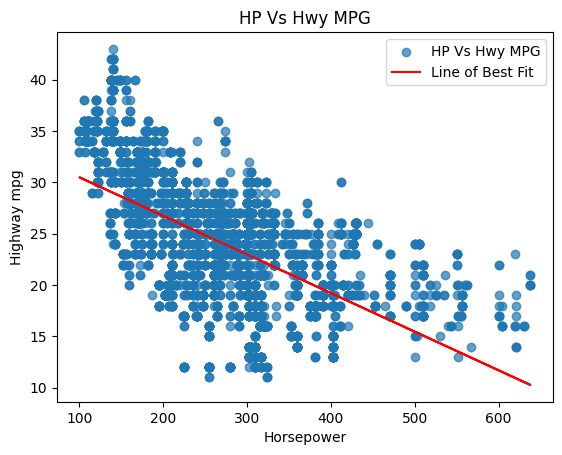

In [17]:
# YOUR CODE HERE
#.loc(df[rows] condition,columns)
hp_vs_hwy_mpg = cars_df.loc[cars_df["Fuel Information.Highway mpg"]<150, ["Engine Information.Engine Statistics.Horsepower","Fuel Information.Highway mpg"]].copy()
#sns.scatterplot(hp_vs_hwy_mpg,x=hp_vs_hwy_mpg["Engine Information.Engine Statistics.Horsepower"], y = cars_df["Fuel Information.Highway mpg"])

# matplotlib
# define variables
x = hp_vs_hwy_mpg["Engine Information.Engine Statistics.Horsepower"]
y = hp_vs_hwy_mpg["Fuel Information.Highway mpg"]

# Use np.polyfit or any other method/library to plot the line of best fit
# 1 for degree is best fit
coeffs = np.polyfit(x,y,1)
m, b = coeffs
print(f"Slope: {m:.3f}, Intercept: {b:.3f}")

# plot scatter
plt.scatter(x, y, label="HP Vs Hwy MPG", alpha=.7)
# plot fitted line
plt.plot(x, m*x + b, color="red", label="Line of Best Fit")

#define the labels
plt.xlabel("Horsepower")
plt.ylabel("Highway mpg")
plt.title("HP Vs Hwy MPG")
plt.legend()
plt.show()

In [18]:
[col for col in cars_df.columns if "torque" in col.lower()]

['Engine Information.Engine Statistics.Torque']

3.3 Repeat the same for engine horsepower(x-axis) and engine torque(y-axis) - 0.5 point

Optional)(Subjective) What can you tell about the correlation between engine horsepower and engine torque?

A. The slope of ~1 is saying for every 1 increase in x (Horsepower), y (Torque) also increase by 1. So also for every 100 increases in hp you see an equal increase in torque.

Slope: 0.986, Intercept: 6.033


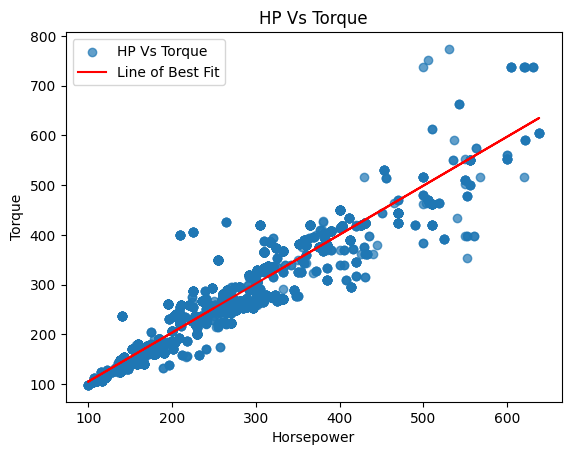

In [19]:
# YOUR CODE HERE
# YOUR CODE HERE
#.loc(df[rows] condition,columns)
hp_vs_hwy_mpg = cars_df[["Engine Information.Engine Statistics.Horsepower","Engine Information.Engine Statistics.Torque"]].copy()

#sns.scatterplot(hp_vs_hwy_mpg,x=hp_vs_hwy_mpg["Engine Information.Engine Statistics.Horsepower"], y = cars_df["Fuel Information.Highway mpg"])

# matplotlib
# define variables
x = hp_vs_hwy_mpg["Engine Information.Engine Statistics.Horsepower"]
y = hp_vs_hwy_mpg["Engine Information.Engine Statistics.Torque"]

# Use np.polyfit or any other method/library to plot the line of best fit
# 1 for degree is best fit
coeffs = np.polyfit(x,y,1)
m, b = coeffs
print(f"Slope: {m:.3f}, Intercept: {b:.3f}")

# plot scatter
plt.scatter(x, y, label="HP Vs Torque", alpha=.7)
# plot fitted line
plt.plot(x, m*x + b, color="red", label="Line of Best Fit")

#define the labels
plt.xlabel("Horsepower")
plt.ylabel("Torque")
plt.title("HP Vs Torque")
plt.legend()
plt.show()

### 4. Subplots - 3 points

* Create a 2 x 2 subplots of the following plots. Make sure the entire plot is sufficiently large(Hint - check [`rcParams`](https://matplotlib.org/stable/tutorials/introductory/customizing.html) )
    * Box plot of highway fuel economiy(Note the extreme outlier. You may optionally remove it before plotting it. Both are acceptable solutions) - 0.5 points
    * Pie chart of Model year(`Identification.Year`) - 0.5 points
    * Histogram of Length(`Dimensions.Length`) with appropriate bins - 0.5 points
    * Scatter-plot of Length vs Width(`Dimensions.Width`) with marker size representing engine horsepower - 0.5 point
* Subplot and appropriate labelling - 1 point
* The order of the plots does not matter

In [64]:
[col for col in cars_df.columns if "horse" in col.lower()]


['Engine Information.Engine Statistics.Horsepower']

Ellipsis

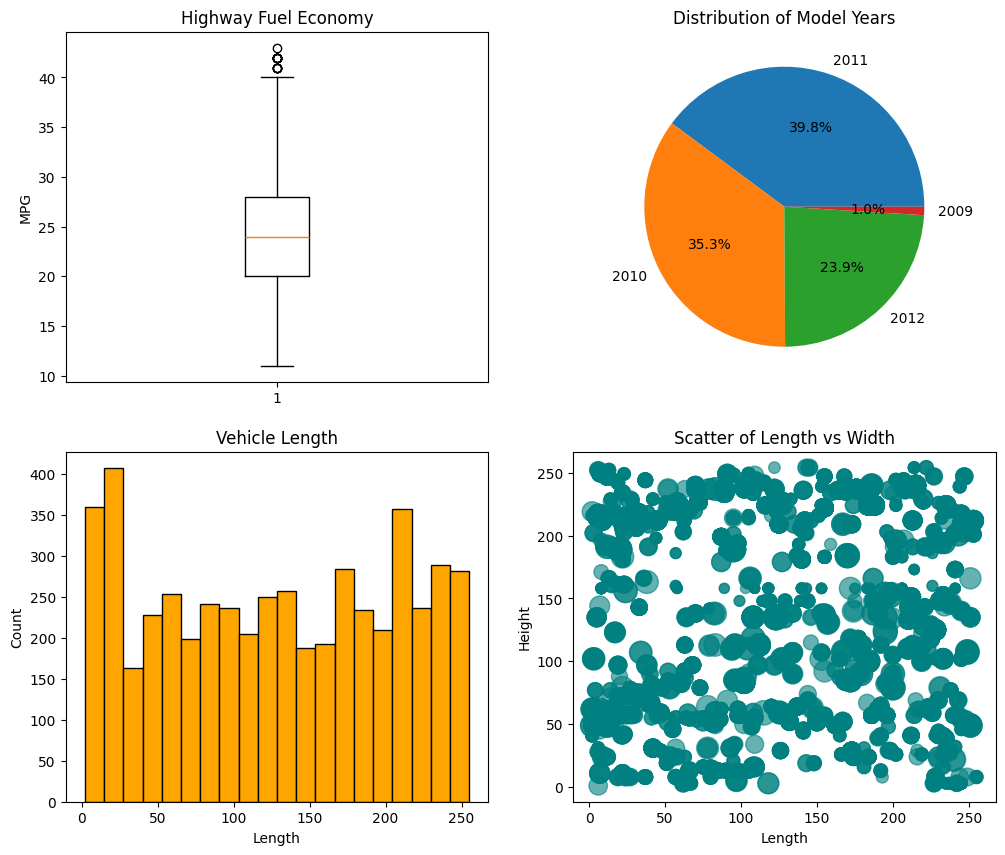

In [67]:
# YOUR CODE HERE
# 1️⃣ Filter unrealistic highway MPG outliers
# Hint: use .loc with a condition (e.g., mpg < 150) and .copy()
#filter outliers
subplot_data = cars_df.loc[cars_df["Fuel Information.Highway mpg"]<150].copy()

# 2️⃣ Create a 2x2 grid of subplots
# Hint: use plt.subplots(rows, cols, figsize=(width, height))
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# -------------------- SUBPLOT 1 --------------------
# Box plot of highway fuel economy
# Hint: use axes[0, 0].boxplot() and set a title + label
# we use axes[0,0] instead of plt since we initiated plt already
axes[0,0].boxplot(subplot_data["Fuel Information.Highway mpg"])
axes[0,0].set_title("Highway Fuel Economy")
axes[0,0].set_ylabel("MPG")

# -------------------- SUBPLOT 2 --------------------
# Pie chart of model year (Identification.Year)
# Hint: use value_counts() for counts and axes[0, 1].pie()
model_years = subplot_data["Identification.Year"].value_counts()
axes[0,1].pie(model_years, labels=model_years.index, autopct="%1.1f%%")
axes[0, 1].set_title("Distribution of Model Years")

# -------------------- SUBPLOT 3 --------------------
# Histogram of vehicle length (Dimensions.Length)
# Hint: use axes[1, 0].hist() with bins=20 and color
vehicle_length = cars_df["Dimensions.Length"]
axes[1,0].hist(vehicle_length, bins = 20, color='orange', edgecolor='black')
axes[1,0].set_xlabel("Length")
axes[1,0].set_ylabel("Count")
axes[1,0].set_title("Vehicle Length")
# -------------------- SUBPLOT 4 --------------------
# Scatter plot of Length vs Width (Dimensions.Width)
# Hint: use axes[1, 1].scatter(x, y, s=horsepower/2, alpha=0.6)
axes[1,1].scatter(cars_df["Dimensions.Length"], cars_df["Dimensions.Width"],s=cars_df["Engine Information.Engine Statistics.Horsepower"]/2,alpha=0.6,
    color="teal")
axes[1,1].set_xlabel("Length")
axes[1,1].set_ylabel("Height")
axes[1,1].set_title("Scatter of Length vs Width")

# 3️⃣ Adjust titles and layout
# Hint: use fig.suptitle() for a main title and plt.tight_layout() to clean spacing
...

### 5. Heatmap - 3 points

* Create a heatmap of "Make of the car" vs "year+transmission type" for "number of models for that year"
    * Pick the top 8 car manufactutres (`Identification.Make`) by number of cars produced - x-axis
    * Use a combination of model year and transmission type on y-axis.
        * All entries with Automatic transmission should be renamed to "AT" and manual to "MT"
        * Each entry on the Y-axis should look like "2009-AT" representing the model year 2009 and Automatic transmission type
        * This will require some pre-processing with pandas before plotting the heatmap
    * Create a heatmap where each data point shows the number of such models created
    * The heatmap should be of size 8x8, with top 8 manufactutres on x-axis and 8 combinations(4 years and 2 transmission types) of year-transmission on y-axis

In [21]:
# YOUR CODE HERE

### 6. Pair-plots (Seaborn) - 2 points
* Create a pair-plot of the following columns: length, width, highway fuel economy, city fuel economy, engine power, engine torque
* Which of the pairs show a positive correlation? Which of the pairs show a negative correlation?

In [22]:
# YOUR CODE HERE